In [1]:
from astropy import units as unit
from astropy import constants as ct
from astropy.constants import astropyconst20 as const

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_df(filename):
    df = pd.read_csv(filename,skiprows = 6,sep='\t', encoding = 'utf-16').astype(float)
    df = df.reset_index()
    df = df.rename(columns={'index':'lambda', '#Data (visible)':'abs'})
    df = df[df.columns].iloc[:201]
    df['lambda'] = df['lambda'].astype(float)
    return df

In [4]:
# NO TOCAR

def get_r(x_cut):
    l_cut = x_cut * unit.nm
    E = ct.h * ct.c / l_cut
    
    E_bulk = 3.4 * unit.eV
    me = 0.28
    mh = 0.59
    eps = 8.5
    
    c1 = ct.hbar**2 * np.pi**2 / 2 / ct.m_e
    c1 = c1 * (1/me + 1/mh)

    c2 = -1.8 * const.e**2 / 4 / np.pi / eps / ct.eps0

    c3 = -0.124 * const.e**4 / (ct.hbar * 4 * np.pi * eps * ct.eps0)**2 
    c3 = c3 * ct.m_e / (1/me + 1/mh)
    
    c4 = c3+E_bulk-E
    
    c4 = c4.to('eV').value
    c2 = c2.to('eV m').value
    c1 = c1.to('eV m**2').value
     
    raices = np.roots((c4,c2,c1))
    
    c3 = c3.to('eV').value
    
    #print(c1,c2,c3,c4)
    
    return raices


In [5]:
# Ecuación de Brus

def brus_r(x_cut):
    l_cut = x_cut * unit.nm
    E = ct.h * ct.c / l_cut
    
    E_bulk = 3.4 * unit.eV
    me = 0.28
    mh = 0.59
    eps = 8.5
    
    c1 = ct.hbar**2 * np.pi**2 / 2 / ct.m_e
    c1 = c1 * (1/me + 1/mh)
    
    raiz = np.sqrt(c1/(E-E_bulk))
    
    #c3 = c3.to('eV').value
    
    return raiz.to('nm').value


In [6]:
brus_r(360)

6.708298925136623

In [7]:
df1 = read_df('a1.csv')
df2 = read_df('a2.csv')
df3 = read_df('a3.csv')
df4 = read_df('a4.csv')
df5 = read_df('a5.csv')
df6 = read_df('a6.csv')
df7 = read_df('a7.csv')
df8 = read_df('a8.csv')
df9 = read_df('a9.csv')

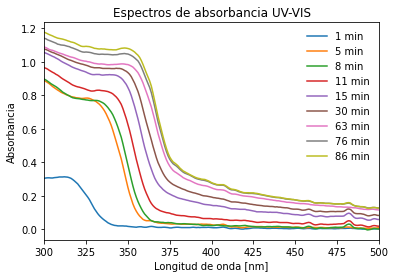

In [8]:
plt.plot(df1['lambda'],df1['abs'],label='1 min')
plt.plot(df2['lambda'],df2['abs'],label='5 min')
plt.plot(df3['lambda'],df3['abs'],label='8 min')
plt.plot(df4['lambda'],df4['abs'],label='11 min')
plt.plot(df5['lambda'],df5['abs'],label='15 min')
plt.plot(df6['lambda'],df6['abs'],label='30 min')
plt.plot(df7['lambda'],df7['abs'],label='63 min')
plt.plot(df8['lambda'],df8['abs'],label='76 min')
plt.plot(df9['lambda'],df9['abs'],label='86 min')
plt.xticks(np.arange(300,501,25))
plt.xlim((300,500))
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Absorbancia")
plt.legend(frameon=False)
plt.title("Espectros de absorbancia UV-VIS")
plt.savefig("espectros abs uv vis.jpg",dpi=200)

In [9]:
lista_x_cut = []

In [10]:
def linea_tangente(df,l_0,xlim=None,ylim=None):
    x0 = l_0
    
    i = df.index[df['lambda'] == l_0]
    y0 = df['abs'].loc[i].iloc[0]
    
    delta_y = df['abs'].loc[i+1].iloc[0] - df['abs'].loc[i-1].iloc[0]  
    delta_x = df['lambda'].loc[i+1].iloc[0] - df['lambda'].loc[i-1].iloc[0]
    
    m = delta_y / delta_x
    b = y0 - m*x0
    
    x_cut = x0 - y0/m
    
    plt.plot(df['lambda'],m*df['lambda']+b,'-k')
    plt.plot(df['lambda'],df['abs'],'.')
    
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
        
    plt.axhline(y=0)

    print(m,b,x_cut)
    
    return m,b,x_cut


-0.016499999999999987 5.567999999999996 337.45454545454544


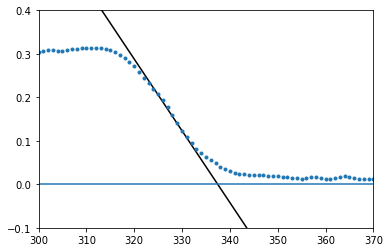

In [11]:
m,b,x_cut = linea_tangente(df1,330,xlim=(300,370),ylim=(-0.1,0.4))
lista_x_cut.append(x_cut)

-0.038500000000000006 13.743000000000002 356.961038961039


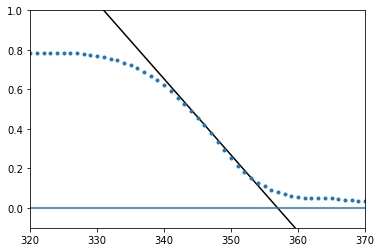

In [12]:
m,b,x_cut = linea_tangente(df2,346,xlim=(320,370),ylim=(-0.1,1))
lista_x_cut.append(x_cut)

-0.04300000000000001 15.433000000000003 358.90697674418607


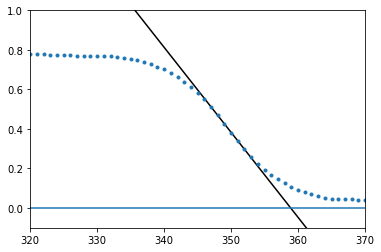

In [13]:
m,b,x_cut = linea_tangente(df3,348,xlim=(320,370),ylim=(-0.1,1))
lista_x_cut.append(x_cut)

-0.04249999999999998 15.509999999999994 364.94117647058823


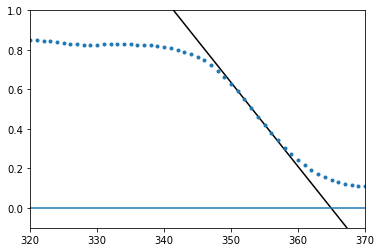

In [14]:
m,b,x_cut = linea_tangente(df4,352,xlim=(320,370),ylim=(-0.1,1))
lista_x_cut.append(x_cut)

-0.043999999999999984 16.326999999999995 371.0681818181818


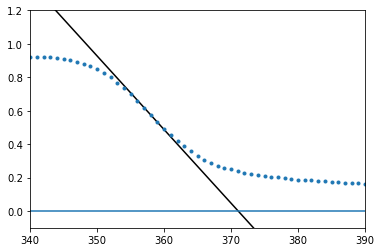

In [15]:
m,b,x_cut = linea_tangente(df5,358,xlim=(340,390),ylim=(-0.1,1.2))
lista_x_cut.append(x_cut)

-0.03799999999999992 14.360999999999972 377.92105263157896


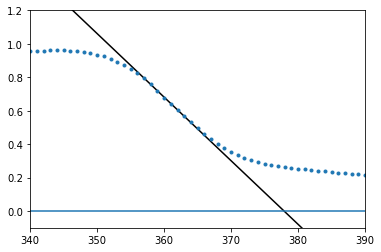

In [16]:
m,b,x_cut = linea_tangente(df6,358,xlim=(340,390),ylim=(-0.1,1.2))
lista_x_cut.append(x_cut)

-0.033999999999999975 13.10699999999999 385.5


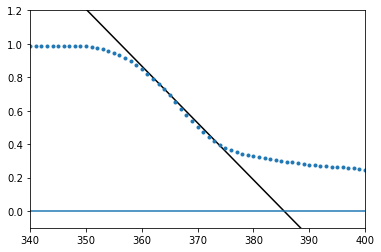

In [17]:
m,b,x_cut = linea_tangente(df7,364,xlim=(340,400),ylim=(-0.1,1.2))
lista_x_cut.append(x_cut)

-0.04149999999999998 15.923499999999994 383.69879518072287


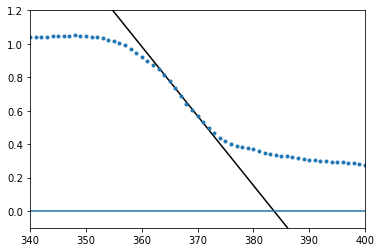

In [18]:
m,b,x_cut = linea_tangente(df8,365,xlim=(340,400),ylim=(-0.1,1.2))
lista_x_cut.append(x_cut)

-0.040000000000000036 15.393000000000011 384.825


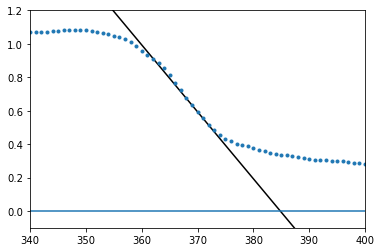

In [19]:
m,b,x_cut = linea_tangente(df9,369,xlim=(340,400),ylim=(-0.1,1.2))
lista_x_cut.append(x_cut)

In [20]:
# Estos son los valores de lambda_cut para los 9 tiempos
lista_x_cut

[337.45454545454544,
 356.961038961039,
 358.90697674418607,
 364.94117647058823,
 371.0681818181818,
 377.92105263157896,
 385.5,
 383.69879518072287,
 384.825]

In [21]:
# Estos serían los radios para esos 9 valores de lambda_cut
lista_r = []
for i in range(len(lista_x_cut)):
    radios = get_r(lista_x_cut[i])
    lista_r.append(radios[1])
lista_r

[2.16093520872526e-09,
 3.3923188731492464e-09,
 3.6800976437652872e-09,
 5.80444855491176e-09,
 (3.058271544949769e-09-5.510817363973456e-09j),
 (1.380520340927712e-09-4.0031174754580746e-09j),
 (8.715374020413283e-10-3.2496648111757784e-09j),
 (9.538581004723642e-10-3.3881071162154185e-09j),
 (9.005786138106166e-10-3.2994024627246e-09j)]

C:\Users\nephi\Downloads\anaconda SI\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


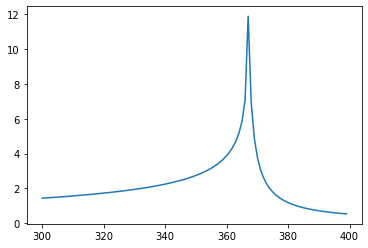

In [67]:
# Esto es para mostrar que después de un cierto valor de lambda_cut
# los radios resulten en valores complejos

array_l_cut = np.arange(300,400)
array_r = []

for i in range(len(array_l_cut)):
    r = get_r(array_l_cut[i])[1] * 1e9
    array_r.append(r)
plt.plot(array_l_cut,array_r)

C:\Users\nephi\Downloads\anaconda SI\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\nephi\Downloads\anaconda SI\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


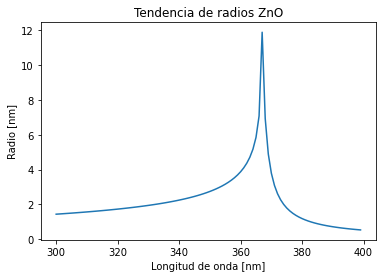

In [114]:
array_l_cut = np.arange(300,400)
array_r = []
array_brus = []
for i in range(len(array_l_cut)):
    r = get_r(array_l_cut[i])[1] * 1e9
    array_r.append(r)
    r = brus_r(array_l_cut[i])
    array_brus.append(r)
plt.plot(array_l_cut,array_r)
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Radio [nm]")
plt.legend(frameon=False)
plt.title("Tendencia de radios ZnO")
plt.savefig("TENDENCIA DE RADIOS.jpg",dpi=200)

### Intento de corrección de la calibración

In [24]:
def correct_curve(df):
    
    df_corr = df.copy()
    
    # restando las longitudes de onda 500 y 400
    delta_y = df.loc[200]['abs'] - df.loc[100]['abs']
    delta_x = df.loc[200]['lambda'] - df.loc[100]['lambda']
    m = delta_y / delta_x
    
    x0 = df.loc[200]['lambda']
    y0 = df.loc[200]['abs']
    b = y0 - m*x0
    
    df_corr['abs_corr'] = df['abs'] - (m*df['lambda'] + b)
    
    
    return df_corr

In [25]:
df1_corr = correct_curve(df1)
df2_corr = correct_curve(df2)
df3_corr = correct_curve(df3)
df4_corr = correct_curve(df4)
df5_corr = correct_curve(df5)
df6_corr = correct_curve(df6)
df7_corr = correct_curve(df7)
df8_corr = correct_curve(df8)
df9_corr = correct_curve(df9)

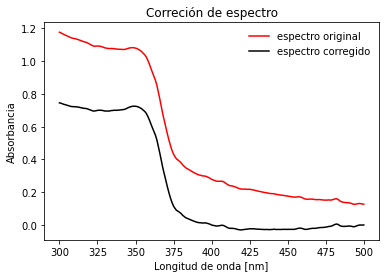

In [51]:
plt.plot(df9_corr['lambda'],df9_corr['abs'],'r',label="espectro original")
plt.plot(df9_corr['lambda'],df9_corr['abs_corr'],'k',label="espectro corregido")
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Absorbancia")
plt.legend(frameon=False)
plt.title("Correción de espectro")
plt.savefig("correccion espectro.jpg",dpi=200)

GRÁFICA CORREGIDA

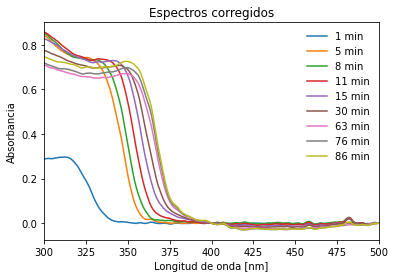

In [27]:
plt.plot(df1_corr['lambda'],df1_corr['abs_corr'],label='1 min')
plt.plot(df2_corr['lambda'],df2_corr['abs_corr'],label='5 min')
plt.plot(df3_corr['lambda'],df3_corr['abs_corr'],label='8 min')
plt.plot(df4_corr['lambda'],df4_corr['abs_corr'],label='11 min')
plt.plot(df5_corr['lambda'],df5_corr['abs_corr'],label='15 min')
plt.plot(df6_corr['lambda'],df6_corr['abs_corr'],label='30 min')
plt.plot(df7_corr['lambda'],df7_corr['abs_corr'],label='63 min')
plt.plot(df8_corr['lambda'],df8_corr['abs_corr'],label='76 min')
plt.plot(df9_corr['lambda'],df9_corr['abs_corr'],label='86 min')
plt.xticks(np.arange(300,501,25))
plt.xlim((300,500))
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Absorbancia")
plt.legend(frameon=False)
plt.title("Espectros corregidos")
plt.savefig("espectros_corregidos.jpg",dpi=200)

*TANGENTES PARA X_CUT*

In [28]:
lista_x_cut_corr = []

No handles with labels found to put in legend.


-0.017 5.737 337.47058823529414


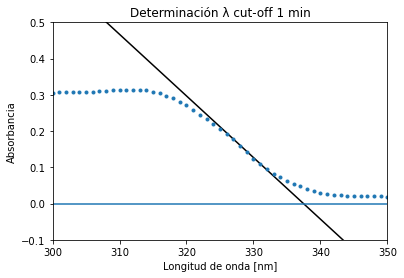

In [61]:
m,b,x_cut = linea_tangente(df1_corr,327,xlim=(300,350),ylim=(-0.1,0.5))
lista_x_cut_corr.append(x_cut)
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Absorbancia")
plt.legend(frameon=False)
plt.title("Determinación λ cut-off 1 min")
plt.savefig("espectros_corregidos.jpg",dpi=100)

-0.038500000000000006 13.743000000000002 356.961038961039


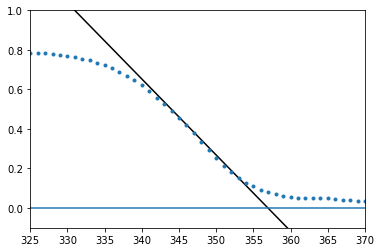

In [30]:
m,b,x_cut = linea_tangente(df2_corr,346,xlim=(325,370),ylim=(-0.1,1))
lista_x_cut_corr.append(x_cut)

-0.04050000000000001 14.555000000000003 359.38271604938274


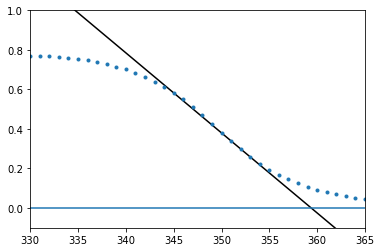

In [31]:
m,b,x_cut = linea_tangente(df3_corr,352,xlim=(330,365),ylim=(-0.1,1))
lista_x_cut_corr.append(x_cut)

-0.04100000000000001 14.974000000000004 365.2195121951219


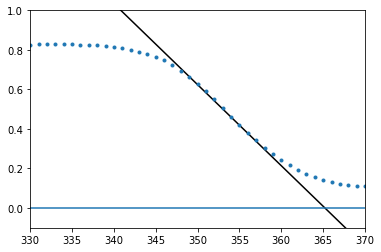

In [32]:
m,b,x_cut = linea_tangente(df4_corr,355,xlim=(330,370),ylim=(-0.1,1))
lista_x_cut_corr.append(x_cut)

-0.038500000000000034 14.350000000000012 372.7272727272727


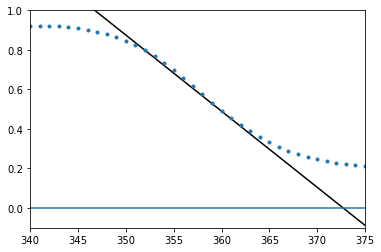

In [33]:
m,b,x_cut = linea_tangente(df5_corr,360,xlim=(340,375),ylim=(-0.1,1))
lista_x_cut_corr.append(x_cut)

-0.036500000000000005 13.818500000000002 378.5890410958904


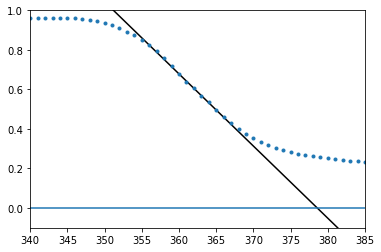

In [34]:
m,b,x_cut = linea_tangente(df6_corr,365,xlim=(340,385),ylim=(-0.1,1))
lista_x_cut_corr.append(x_cut)

-0.04149999999999998 15.843499999999993 381.7710843373494


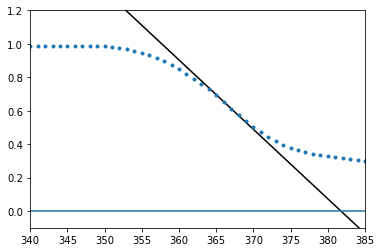

In [35]:
m,b,x_cut = linea_tangente(df7_corr,367,xlim=(340,385),ylim=(-0.1,1.2))
lista_x_cut_corr.append(x_cut)

-0.045499999999999985 17.385499999999997 382.0989010989011


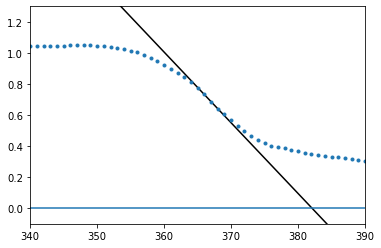

In [36]:
m,b,x_cut = linea_tangente(df8_corr,367,xlim=(340,390),ylim=(-0.1,1.3))
lista_x_cut_corr.append(x_cut)

-0.045999999999999985 17.603999999999996 382.69565217391306


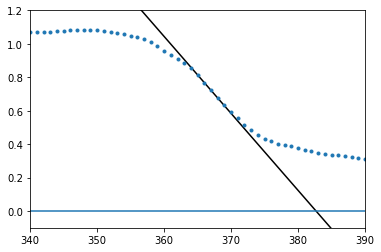

In [37]:
m,b,x_cut = linea_tangente(df9_corr,366, xlim=(340,390),ylim=(-0.1,1.2))
lista_x_cut_corr.append(x_cut)

CORRECCIÓN

In [38]:
# Estos serían los radios para esos 9 valores de lambda_cut
lista_r_corr = []
for i in range(len(lista_x_cut_corr)):
    radios = get_r(lista_x_cut_corr[i])*1e9
    lista_r_corr.append(radios[1])
lista_r_corr

[2.161469229928676,
 3.3923188731492466,
 3.763503720789716,
 6.054927547680154,
 (2.3555483047087327-5.00462350457701j),
 (1.3117675256824737-3.9137017077446155j),
 (1.0622925539984218-3.559359841888477j),
 (1.0420632237580063-3.528294919415538j),
 (1.007231247550179-3.4738787368306343j)]

In [39]:
lista_x_cut_corr

[337.47058823529414,
 356.961038961039,
 359.38271604938274,
 365.2195121951219,
 372.7272727272727,
 378.5890410958904,
 381.7710843373494,
 382.0989010989011,
 382.69565217391306]

In [40]:
list_E = [(ct.h * ct.c / (l_cut * unit.nm)).to('J').value for l_cut in lista_x_cut_corr]

In [41]:
list_time = [1,5,8,11,15,30,63,76,86]

In [42]:
df = pd.DataFrame(list(zip(list_time, lista_x_cut_corr,list_E,lista_r_corr)),
               columns =['Tiempo [min]', r'$\lambda$ [nm]','Energia [J]','Radio [nm]'])

In [43]:
df

,Tiempo [min],$\lambda$ [nm],Energia [J],Radio [nm]
0,1,337.470588,5.886278e-19,2.161469+0.000000j
1,5,356.961039,5.564881e-19,3.392319+0.000000j
2,8,359.382716,5.527383e-19,3.763504+0.000000j
3,11,365.219512,5.439046e-19,6.054928+0.000000j
4,15,372.727273,5.329489e-19,2.355548-5.004624j
5,30,378.589041,5.246971e-19,1.311768-3.913702j
6,63,381.771084,5.203238e-19,1.062293-3.559360j
7,76,382.098901,5.198774e-19,1.042063-3.528295j
8,86,382.695652,5.190667e-19,1.007231-3.473879j


In [44]:
lista_x_cut_despl = [x-17 for x in lista_x_cut_corr]

In [45]:
list_E_despl = [(ct.h * ct.c / (l_cut * unit.nm)).to('J').value for l_cut in lista_x_cut_despl]

In [70]:
# Estos serían los radios para esos 9 valores de lambda_cut
lista_r_despl = []
for i in range(len(lista_x_cut_despl)):
    radios = get_r(lista_x_cut_despl[i])*1e9
    lista_r_despl.append(radios[1])
lista_r_despl

[1.7417687839427447,
 2.2491834739955765,
 2.3449953831973707,
 2.6355978228381467,
 3.243299540151601,
 4.254290230716792,
 5.669235274381476,
 5.9414169336922935,
 6.603811529593965]

In [47]:
df2 = pd.DataFrame(list(zip(list_time, lista_x_cut_despl,list_E_despl,lista_r_despl)),
               columns =['Tiempo [min]', r'$\lambda$ [nm]','Energia [J]','Radio [nm]'])

In [48]:
df2

,Tiempo [min],$\lambda$ [nm],Energia [J],Radio [nm]
0,1,320.470588,6.198528e-19,1.741769
1,5,339.961039,5.843157e-19,2.249183
2,8,342.382716,5.801829e-19,2.344995
3,11,348.219512,5.704579e-19,2.635598
4,15,355.727273,5.584182e-19,3.243300
5,30,361.589041,5.493656e-19,4.254290
6,63,364.771084,5.445733e-19,5.669235
7,76,365.098901,5.440843e-19,5.941417
8,86,365.695652,5.431965e-19,6.603812


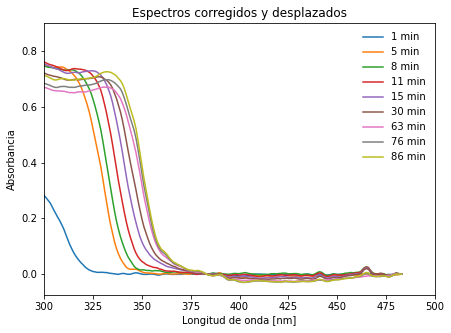

In [49]:
plt.figure(figsize=(7,5))
plt.plot(df1_corr['lambda']-17,df1_corr['abs_corr'],label='1 min')
plt.plot(df2_corr['lambda']-17,df2_corr['abs_corr'],label='5 min')
plt.plot(df3_corr['lambda']-17,df3_corr['abs_corr'],label='8 min')
plt.plot(df4_corr['lambda']-17,df4_corr['abs_corr'],label='11 min')
plt.plot(df5_corr['lambda']-17,df5_corr['abs_corr'],label='15 min')
plt.plot(df6_corr['lambda']-17,df6_corr['abs_corr'],label='30 min')
plt.plot(df7_corr['lambda']-17,df7_corr['abs_corr'],label='63 min')
plt.plot(df8_corr['lambda']-17,df8_corr['abs_corr'],label='76 min')
plt.plot(df9_corr['lambda']-17,df9_corr['abs_corr'],label='86 min')
plt.xticks(np.arange(300,501,25))
plt.xlim((300,500))
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Absorbancia")
plt.legend(frameon=False)
plt.title("Espectros corregidos y desplazados")
plt.savefig("espectros_desplazados.jpg",dpi=200)

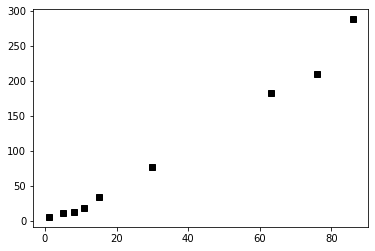

In [75]:
r3 = [r**3 for r in lista_r_despl]
plt.plot(list_time,r3,'sk')

In [96]:
r3 = np.array(r3)
time = np.array(list_time)*60

In [104]:
time

array([  60,  300,  480,  660,  900, 1800, 3780, 4560, 5160])

In [97]:
denominador = r3.size * (time**2).sum() - (time.sum())**2

In [98]:
A = r3.sum() * (time**2).sum() - time.sum() * (time * r3).sum()
A = A / denominador

In [99]:
B = r3.size * (time * r3).sum() - time.sum() * r3.sum() 
B = B/denominador

No handles with labels found to put in legend.


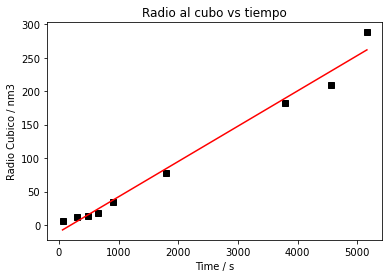

In [112]:
r3 = [r**3 for r in lista_r_despl]
plt.plot(time,r3,'sk')
plt.plot(time,B*time+A,'-r')
plt.xlabel("Time / s")
plt.ylabel("Radio Cubico / nm3")
plt.legend(frameon=False)
plt.title("Radio al cubo vs tiempo")
plt.savefig("cubo.jpg",dpi=200)

In [107]:
A

-10.532859537355543

In [108]:
B

0.05275226771090026